<a href="https://colab.research.google.com/github/aqeeld4/LINUX_PROJECT/blob/main/Flower_Recognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### FLOWER RECOGNITION - CNN | Keras


# New Section

In [ ]:
# installing tensorflow gpu for smooth processing
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 19 kB/s 
     |████████████████████████████████| 438 kB 59.5 MB/s 
     |████████████████████████████████| 5.9 MB 64.7 MB/s 
     |████████████████████████████████| 1.7 MB 89.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

Import Libraries

In [4]:
## Importing all the necessary libraries

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


Load Data


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
## Initializing empty dictonaries for using them as dependent and independent sets later
X=[]
Z=[]
IMG_SIZE=150


## importing data into seperate variable as per the name of flowers

FLOWER_DAISY_DIR='/content/drive/MyDrive/flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/drive/MyDrive/flowers/sunflower'
FLOWER_TULIP_DIR='/content/drive/MyDrive/flowers/tulip'
FLOWER_DANDI_DIR='/content/drive/MyDrive/flowers/dandelion'
FLOWER_ROSE_DIR='/content/drive/MyDrive/flowers/rose'

In [12]:
## Function to assign lables to the flower image

def assign_label(img,flower_type):
    return flower_type

In [13]:
## Function to create training data with names of the flowers as lebles using pre defined function

def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [14]:
## Creating training data for each type of flower

make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 764/764 [00:20<00:00, 37.68it/s] 


764


100%|██████████| 733/733 [00:21<00:00, 34.22it/s] 


1497


100%|██████████| 999/999 [00:28<00:00, 34.60it/s] 


2496


100%|██████████| 1052/1052 [00:31<00:00, 33.93it/s] 


3548


100%|██████████| 794/794 [00:16<00:00, 48.83it/s] 

4342


Print Ramdom Input Images with Flower names as lables

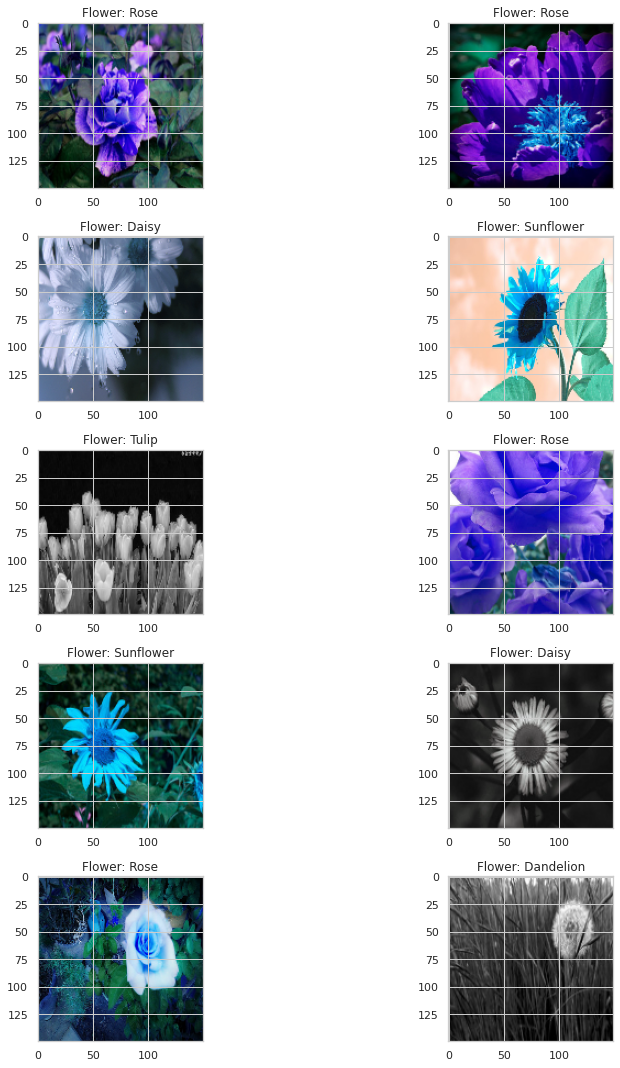

In [15]:
## Print some random input images from our training dataset

fig, ax = plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
  for j in range(2):
    l = rn.randint(0,len(Z))
    ax[i,j].imshow(X[l])
    ax[i,j].set_title('Flower: ' + Z[l])

plt.tight_layout()

Encoding and scaling of categorical data to make it model friendly

In [16]:
## Encode categorical data

le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y,5)

## Convert input data into an array and scale down the pixels
X = np.array(X)
X = X/255

Test - Train Split

In [17]:
## Perform test-train split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 50)

In [18]:
## Print independent features of the train data
x_train

array([[[[0.88627451, 0.63529412, 0.29411765],
         [0.89019608, 0.64313725, 0.30196078],
         [0.89411765, 0.64313725, 0.31372549],
         ...,
         [0.90588235, 0.65882353, 0.34901961],
         [0.90196078, 0.65490196, 0.3372549 ],
         [0.90196078, 0.65098039, 0.3254902 ]],

        [[0.89803922, 0.64705882, 0.31764706],
         [0.90588235, 0.65490196, 0.32941176],
         [0.91372549, 0.65882353, 0.34117647],
         ...,
         [0.91372549, 0.67058824, 0.36862745],
         [0.91372549, 0.67058824, 0.35686275],
         [0.91372549, 0.66666667, 0.34901961]],

        [[0.89803922, 0.64705882, 0.33333333],
         [0.90980392, 0.65882353, 0.34509804],
         [0.92156863, 0.66666667, 0.36078431],
         ...,
         [0.91764706, 0.67843137, 0.38823529],
         [0.91764706, 0.67843137, 0.37647059],
         [0.92156863, 0.6745098 , 0.36470588]],

        ...,

        [[0.05098039, 0.1372549 , 0.0745098 ],
         [0.00392157, 0.21960784, 0.11764706]

In [19]:
## Print target feature of the train data
y_train

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
#!pip install rasa==1.1.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 447 kB 5.1 MB/s 
     |████████████████████████████████| 92.7 MB 49 kB/s 
     |████████████████████████████████| 266 kB 37.6 MB/s 
     |████████████████████████████████| 51 kB 672 kB/s 
     |████████████████████████████████| 72 kB 390 kB/s 
     |████████████████████████████████| 5.1 MB 55.7 MB/s 
     |████████████████████████████████| 148 kB 61.1 MB/s 
     |████████████████████████████████| 1.3 MB 42.0 MB/s 
     |████████████████████████████████| 132 kB 59.3 MB/s 
     |████████████████████████████████| 47 kB 5.1 MB/s 
     |████████████████████████████████| 508 kB 59.4 MB/s 
     |████████████████████████████████| 60 kB 7.7 MB/s 
     |████████████████████████████████| 59 kB 7.9 MB/s 
     |████████████████████████████████| 654 kB 64.2 MB/s 
     |████████████████████████████████| 40 kB 5.8 MB/s 
     |████████████████████████████████| 490 k

In [20]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

Model Building -  CNN architecture design

In [21]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [27]:
batch_size = 128   #learning set
epochs=10

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

Data Augmentation - Helps Avoiding Overfitting

In [28]:
## Perform data augmentation to avoid overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [29]:
## Compile the CNN
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
## Print Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

Model Fitting

In [31]:
## Fit the CNN model to your data and print the loss and accuracy for both the test and train dataset
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/10
23/23 [==============================] - 189s 8s/step - loss: 1.2464 - accuracy: 0.5191 - val_loss: 1.0418 - val_accuracy: 0.5741
Epoch 2/10
23/23 [==============================] - 182s 8s/step - loss: 1.0263 - accuracy: 0.6122 - val_loss: 1.0511 - val_accuracy: 0.5833
Epoch 3/10
23/23 [==============================] - 186s 8s/step - loss: 0.9514 - accuracy: 0.6314 - val_loss: 0.9497 - val_accuracy: 0.6201
Epoch 4/10
23/23 [==============================] - 185s 8s/step - loss: 0.9169 - accuracy: 0.6445 - val_loss: 0.9236 - val_accuracy: 0.6385
Epoch 5/10
23/23 [==============================] - 185s 8s/step - loss: 0.8780 - accuracy: 0.6517 - val_loss: 0.8869 - val_accuracy: 0.6539
Epoch 6/10
23/23 [==============================] - 187s 8s/step - loss: 0.8262 - accuracy: 0.6843 - val_loss: 0.8595 - val_accuracy: 0.6654
Epoch 7/10
23/23 [==============================] - 184s 8s/step - loss: 0.8191 - accuracy: 0.6888 - val_loss: 0.8825 - val_accuracy: 0.6662
Epoch 8/10
23

Visualization

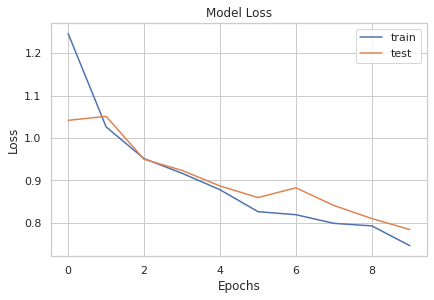

In [32]:
## Print the loss graph for test and train data set

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

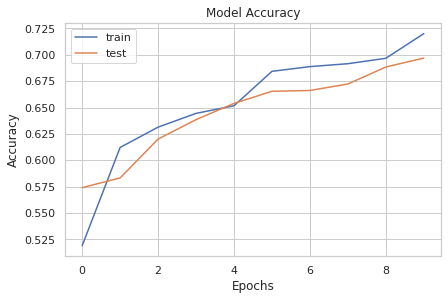

In [33]:
## Print the accuracy graph for test and train data set

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()